<a href="https://colab.research.google.com/github/freedom-780/FBI-Firearm-Background-Check/blob/main/Firearm_Background_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='intro'></a>
## Introduction

> The dataset from The National Instant Criminal Background Check System (NICS) is managed by the FBI  according to the Brady Handgun Violence Prevention Act of 1993 (Brady Act) -- fully implemented on Novemeber 30, 1998 -- and there are differences in state law in regards to requirements. Those that have valid ATF permits and for services and repair picked u by the same person don't require a background check. Data is collected with ATF Form 4473

Types of background checks:

* Handgun—(a) any firearm which has a short stock and is designed to be held and fired by the use of a single hand; and (b) any combination of parts from which a firearm described in paragraph (a) can be assembled.
* Long Gun—a weapon designed or redesigned, made or remade, and intended to be fired from the shoulder, and designed or redesigned and made or remade to use the energy of the explosive in (a) a fixed metallic cartridge to fire a single projectile through a rifled bore for each single pull of the trigger; or (b) a fixed shotgun shell to fire through a smooth bore either a number of ball shot or a single projectile for each single pull of the trigger.
* Other(might want to drop columns or check if they are outliers)—refers to frames, receivers, and other firearms that are neither handguns nor long guns (rifles or shotguns), such as firearms having a pistol grip that expel a shotgun shell, or National Firearms Act firearms, including silencers.

Questions 

* Which type of gun sale is increasing the most?
* Any trends between type of gun ownership and mass shootings?(https://github.com/StanfordGeospatialCenter/MSA/tree/master/Data)
* WHat are the trends in background checks and mass shootings for states with the weakest policies?
* Are there any intresting overall trends, like spikes in gun ownership for certain periods of time such such as policy changes?











In [2]:
# import packages 
import pandas as pd 
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.


### Load Data

In [3]:
# Import data at gun permits and mass shootings 

gun_data = "https://github.com/freedom-780/FBI-Firearm-Background-Check/blob/main/gun_data.xlsx?raw=true"
gun_background_check = pd.read_excel(gun_data)

standford_msa = "https://raw.githubusercontent.com/freedom-780/FBI-Firearm-Background-Check/main/Stanford_MSA_Database.csv"
mass_shootings = pd.read_csv(standford_msa)






In [4]:
# Check to see the column names to figure out which ones are important
gun_background_check.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [5]:
# Check the number of columns an decide which ones to keep
mass_shootings.columns

Index(['CaseID', 'Title', 'Location', 'City', 'State', 'Latitude', 'Longitude',
       'Number of Civilian Fatalities', 'Number of Civilian Injured',
       'Number of Enforcement Fatalities', 'Number of Enforcement Injured',
       'Total Number of Fatalities', 'Total Number of Victims', 'Description',
       'Date', 'Day of Week', 'Date - Detailed', 'Shooter Name',
       'Number of shooters', 'Shooter Age(s)', 'Average Shooter Age',
       'Shooter Sex', 'Shooter Race', 'Type of Gun - Detailed',
       'Type of Gun - General', 'Number of Shotguns', 'Number of Rifles',
       'Number of Handguns', 'Total Number of Guns',
       'Number of Automatic Guns', 'Number of Semi-Automatic Guns',
       'Fate of Shooter at the scene', 'Fate of Shooter',
       'Shooter's Cause of Death', 'School Related', 'Place Type',
       'Relationship to Incident Location', 'Targeted Victim/s - Detailed',
       'Targeted Victim/s - General', 'Possible Motive - Detailed',
       'Possible Motive - Genera

### Drop Columns 

Disgard the columns not needs for analysis. 

For the background check 'month', 'state, 'handgun', 'long_gun', 'other', 'multiple',private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'totals' data only the columns most useful for the analysis are

For mass shooting: 

In [6]:
# drop columns that are not needed for analysis

gun_background_check.drop(gun_background_check.columns.difference(['month', 'state', 'handgun', 'long_gun', 'other', 'multiple', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'totals']), 1, inplace=True)


In [7]:
# Check to see if the right columns were dropped 
gun_background_check.columns

Index(['month', 'state', 'handgun', 'long_gun', 'other', 'multiple',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'totals'],
      dtype='object')

In [8]:
# get info and see if data types are correct 
gun_background_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  12485 non-null  object 
 1   state                  12485 non-null  object 
 2   handgun                12465 non-null  float64
 3   long_gun               12466 non-null  float64
 4   other                  5500 non-null   float64
 5   multiple               12485 non-null  int64  
 6   private_sale_handgun   2750 non-null   float64
 7   private_sale_long_gun  2750 non-null   float64
 8   private_sale_other     2750 non-null   float64
 9   totals                 12485 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 975.5+ KB


In [9]:
# Drop the columns that are not needed 
mass_shootings.drop(mass_shootings.columns.difference(['State','Date','Type of Gun - General','Number of Shotguns','Number of Rifles','Number of Handguns','Total Number of Guns','Number of Automatic Guns','Number of Semi-Automatic Guns','Possible Motive - General','History of Mental Illness - General']), 1, inplace=True)

In [10]:
# Check if the correct columns were dropped
mass_shootings.columns

Index(['State', 'Date', 'Type of Gun - General', 'Number of Shotguns',
       'Number of Rifles', 'Number of Handguns', 'Total Number of Guns',
       'Number of Automatic Guns', 'Number of Semi-Automatic Guns',
       'Possible Motive - General', 'History of Mental Illness - General'],
      dtype='object')

### Clean Mass_Shootings Data and Convert to float 

In [11]:
#Check data types of mass shooting
mass_shootings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                335 non-null    object
 1   Date                                 335 non-null    object
 2   Type of Gun - General                335 non-null    object
 3   Number of Shotguns                   335 non-null    object
 4   Number of Rifles                     335 non-null    object
 5   Number of Handguns                   335 non-null    object
 6   Total Number of Guns                 335 non-null    object
 7   Number of Automatic Guns             335 non-null    object
 8   Number of Semi-Automatic Guns        335 non-null    object
 9   Possible Motive - General            333 non-null    object
 10  History of Mental Illness - General  335 non-null    object
dtypes: object(11)
memory usage: 28.9+ KB


The goal is to change the columns that start with "Number" into float64 which will be accomplished in 4 steps

In [12]:
# Check a dictionary with desired data types to change 
mass_change_dtype = {'Number of Shotguns': 'float64', 
                     'Number of Rifles': 'float64', 
                     'Total Number of Guns': 'float64',
                     'Number of Automatic Guns': 'float64',
                     'Number of Semi-Automatic Guns': 'float64',
                     'Number of Handguns': 'float64'
                     }

In [13]:
''' step 1: look at the unique values in each variable
to determine what type of cleaning is required '''

for x in list(mass_change_dtype.keys()):
  print(x)
  print(mass_shootings[x].unique())



Number of Shotguns
['1' '0' '2' 'Unknown' 'Handgun']
Number of Rifles
['3' '0' '1' '0 (1)' '2' 'Unknown']
Total Number of Guns
['7' '1' '2' '3' '6' '10' '4' '5' 'Unknown' '0']
Number of Automatic Guns
['0' '1(0)' '2' '1' 'Unknown']
Number of Semi-Automatic Guns
['1' '0' '1(2)' '3' '2' '4' 'Unknown']
Number of Handguns
['3' '1' '2' '0' '2 (1)' '4' '7' '5' 'Unknown']


In [14]:
''' step 2: find the rows in each key that require cleaning '''

# seclect only rows with a parenthesis 
mask = mass_shootings['Number of Rifles'].str.contains('\(')
mask_1 = mass_shootings['Number of Automatic Guns'].str.contains('\(')
mask_2 = mass_shootings['Number of Semi-Automatic Guns'].str.contains('\(')
mask_3 = mass_shootings['Number of Handguns'].str.contains('\(')

print(mass_shootings.loc[mask,"Number of Rifles"])
print(mass_shootings.loc[mask_1,"Number of Automatic Guns"])
print(mass_shootings.loc[mask_2,"Number of Semi-Automatic Guns"])
print(mass_shootings.loc[mask_3,"Number of Handguns"])


15    0 (1)
Name: Number of Rifles, dtype: object
15    1(0)
Name: Number of Automatic Guns, dtype: object
15    1(2)
Name: Number of Semi-Automatic Guns, dtype: object
15    2 (1)
Name: Number of Handguns, dtype: object


So, the values with parenthes are all in a single row. Now it's time to clean this row. 

In [15]:
# clean data with ")"

# select only rows with parenthesis 
for x in list(mass_change_dtype.keys()):
  # select only rows with parenthesis
  mask_4 = mass_shootings[x].str.contains('\(')
  # make sure there are any relevant rows with a true mask value
  if mask_4.any():
    # set only rows with the issue equal to the first column
    mass_shootings.loc[mask_4, x] = mass_shootings.loc[mask_4, x].str.split('\(', expand=True).iloc[:,0].str.strip()


In [16]:
# Check to see if the cleaning was done correctly 

for x in list(mass_change_dtype.keys()):
  print(mass_shootings[x].unique())

['1' '0' '2' 'Unknown' 'Handgun']
['3' '0' '1' '2' 'Unknown']
['7' '1' '2' '3' '6' '10' '4' '5' 'Unknown' '0']
['0' '1' '2' 'Unknown']
['1' '0' '3' '2' '4' 'Unknown']
['3' '1' '2' '0' '4' '7' '5' 'Unknown']


In [17]:
# drop rows with unknown values 
for i in mass_shootings:
  mass_shootings.drop(mass_shootings.index[mass_shootings[i] == 'Unknown'], inplace = True)
  
    
  

In [18]:

for x in list(mass_change_dtype.keys()):
  print(mass_shootings[x].unique())

['1' '0' '2']
['3' '0' '1' '2']
['7' '1' '2' '3' '6' '10' '4' '5']
['0' '1' '2']
['1' '0' '3' '2' '4']
['3' '1' '2' '0' '4' '7' '5']


In [19]:
#convert the columns in the keys to float64
mass_shootings = mass_shootings.astype(mass_change_dtype)

In [20]:
mass_shootings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 333
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   State                                147 non-null    object 
 1   Date                                 147 non-null    object 
 2   Type of Gun - General                147 non-null    object 
 3   Number of Shotguns                   147 non-null    float64
 4   Number of Rifles                     147 non-null    float64
 5   Number of Handguns                   147 non-null    float64
 6   Total Number of Guns                 147 non-null    float64
 7   Number of Automatic Guns             147 non-null    float64
 8   Number of Semi-Automatic Guns        147 non-null    float64
 9   Possible Motive - General            147 non-null    object 
 10  History of Mental Illness - General  147 non-null    object 
dtypes: float64(6), object(5)
memory 

Since the Columns are the proper data type for both values, its time to do some final cleaning in regards to missing a duplicate values

In [21]:
# print statistics about permit data 

print(f"Shape of gun background data: {gun_background_check.shape}")
print(f"Number of mission values in gun background data:\
{gun_background_check.isnull().sum().sum()}")
print(f"Number of duplicate values in gun background data:\
{gun_background_check.duplicated().sum()}")

Shape of gun background data: (12485, 10)
Number of mission values in gun background data:36229
Number of duplicate values in gun background data:0


### Clean gun_background_check Data  

In [22]:
gun_background_check.isnull().sum(0)

month                       0
state                       0
handgun                    20
long_gun                   19
other                    6985
multiple                    0
private_sale_handgun     9735
private_sale_long_gun    9735
private_sale_other       9735
totals                      0
dtype: int64

since private sales has so many null values(about 10,000 out of about 12,000), these columns should just be dropped, but it's still important data, gun_background will be copied

In [23]:

private_gun_sales = gun_background_check.copy()

In [24]:
# Drop the private data columns"
gun_background_check.drop(['private_sale_handgun','private_sale_long_gun','private_sale_other'], 1, inplace=True)
# Check to see if the rows were dropped
gun_background_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12485 non-null  object 
 1   state     12485 non-null  object 
 2   handgun   12465 non-null  float64
 3   long_gun  12466 non-null  float64
 4   other     5500 non-null   float64
 5   multiple  12485 non-null  int64  
 6   totals    12485 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 682.9+ KB


In [25]:
gun_background_check.isnull().sum(0)

month          0
state          0
handgun       20
long_gun      19
other       6985
multiple       0
totals         0
dtype: int64

Drop the rest of the null values

In [26]:
gun_background_check.dropna(inplace=True)

Drop all columns excpt the private ones 

In [27]:
private_gun_sales.drop(private_gun_sales.columns.difference \
(['month', 'state', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'totals']), 1, inplace=True)


In [28]:
# Check to see if rows were dropped
private_gun_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  12485 non-null  object 
 1   state                  12485 non-null  object 
 2   private_sale_handgun   2750 non-null   float64
 3   private_sale_long_gun  2750 non-null   float64
 4   private_sale_other     2750 non-null   float64
 5   totals                 12485 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 585.4+ KB


Drop na values from private sale data

In [29]:
private_gun_sales.dropna(inplace=True)

In [30]:
private_gun_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 2749
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  2750 non-null   object 
 1   state                  2750 non-null   object 
 2   private_sale_handgun   2750 non-null   float64
 3   private_sale_long_gun  2750 non-null   float64
 4   private_sale_other     2750 non-null   float64
 5   totals                 2750 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 150.4+ KB


### Check missing and duplicate values for mass shooting data 

In [31]:
# print statistics about mass shootings data

print(f"Shape of mass shooting data: {mass_shootings.shape}")
print(f"Number of mission values in mass shooting data: \
{mass_shootings.isnull().sum().sum()}")
print(f"Number of duplicate values in mass shooting data: \
{mass_shootings.duplicated().sum()}")

Shape of mass shooting data: (147, 11)
Number of mission values in mass shooting data: 0
Number of duplicate values in mass shooting data: 0


Now since all three datasets are clean, it's ok to proceed to exploratory data analysis 

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Clean Missing Values

Remove missing values 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Which type of gun background check is increasing the most in general and with time?

In [32]:
gun_background_check.describe()

,handgun,long_gun,other,multiple,totals
count,"5,500.00","5,500.00","5,500.00","5,500.00","5,500.00"
mean,"8,874.54","8,666.89",360.47,341.19,"30,603.89"
std,"11,180.00","10,204.22","1,349.48",512.89,"43,380.59"
min,0.00,0.00,0.00,0.00,0.00
25%,"1,589.75","2,604.00",17.00,14.00,"6,804.00"
50%,"4,947.50","5,697.00",121.00,172.00,"17,624.00"
75%,"11,777.00","11,565.25",354.00,447.00,"36,419.50"
max,"107,224.00","108,058.00","77,929.00","6,582.00","541,978.00"


(0.0, 20000.0)

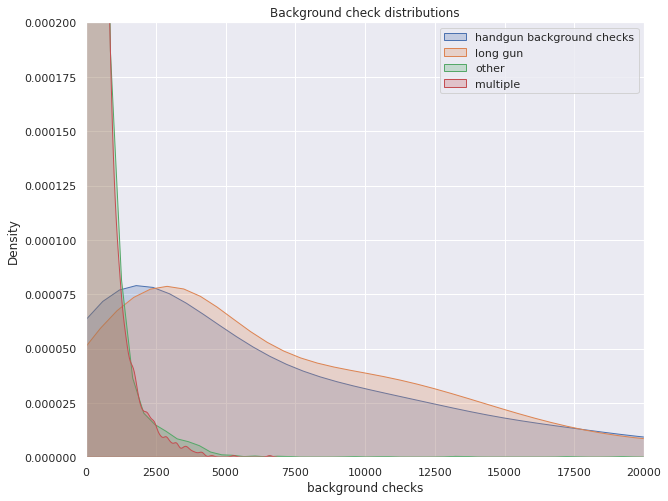

In [33]:
# plot distributions of registered vs casual rides
sns.set(rc={'figure.figsize':(10,8)})
sns.kdeplot(gun_background_check['handgun'], label='handgun background checks', shade= True);
sns.kdeplot(gun_background_check['long_gun'], label='long gun', shade= True)
sns.kdeplot(gun_background_check['other'], label='other',shade= True)
sns.kdeplot(gun_background_check['multiple'], label='multiple',shade= True)
plt.legend()
plt.xlabel('background checks')
plt.title("Background check distributions")
plt.ylim(0,.0002)
plt.xlim(0,20000)




it seems like multiple and other backgroundchecks are close to zero while handguns and longguns are similar in distributions now but would like to look at how these values vary for different times and states 

In [34]:
# Use rolling average to smooth out the graph below
gun_background_check['7year_rolling_avg_handgun'] = gun_background_check.handgun.rolling(7).mean() 

In [35]:
gun_background_check['7year_rolling_avg_longgun'] = gun_background_check.long_gun.rolling(7).mean() 

In [36]:
gun_background_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5500 entries, 0 to 5499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      5500 non-null   object 
 1   state                      5500 non-null   object 
 2   handgun                    5500 non-null   float64
 3   long_gun                   5500 non-null   float64
 4   other                      5500 non-null   float64
 5   multiple                   5500 non-null   int64  
 6   totals                     5500 non-null   int64  
 7   7year_rolling_avg_handgun  5494 non-null   float64
 8   7year_rolling_avg_longgun  5494 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 429.7+ KB


Text(0.5, 1.0, 'Line Chart of Background Checks by gun type')

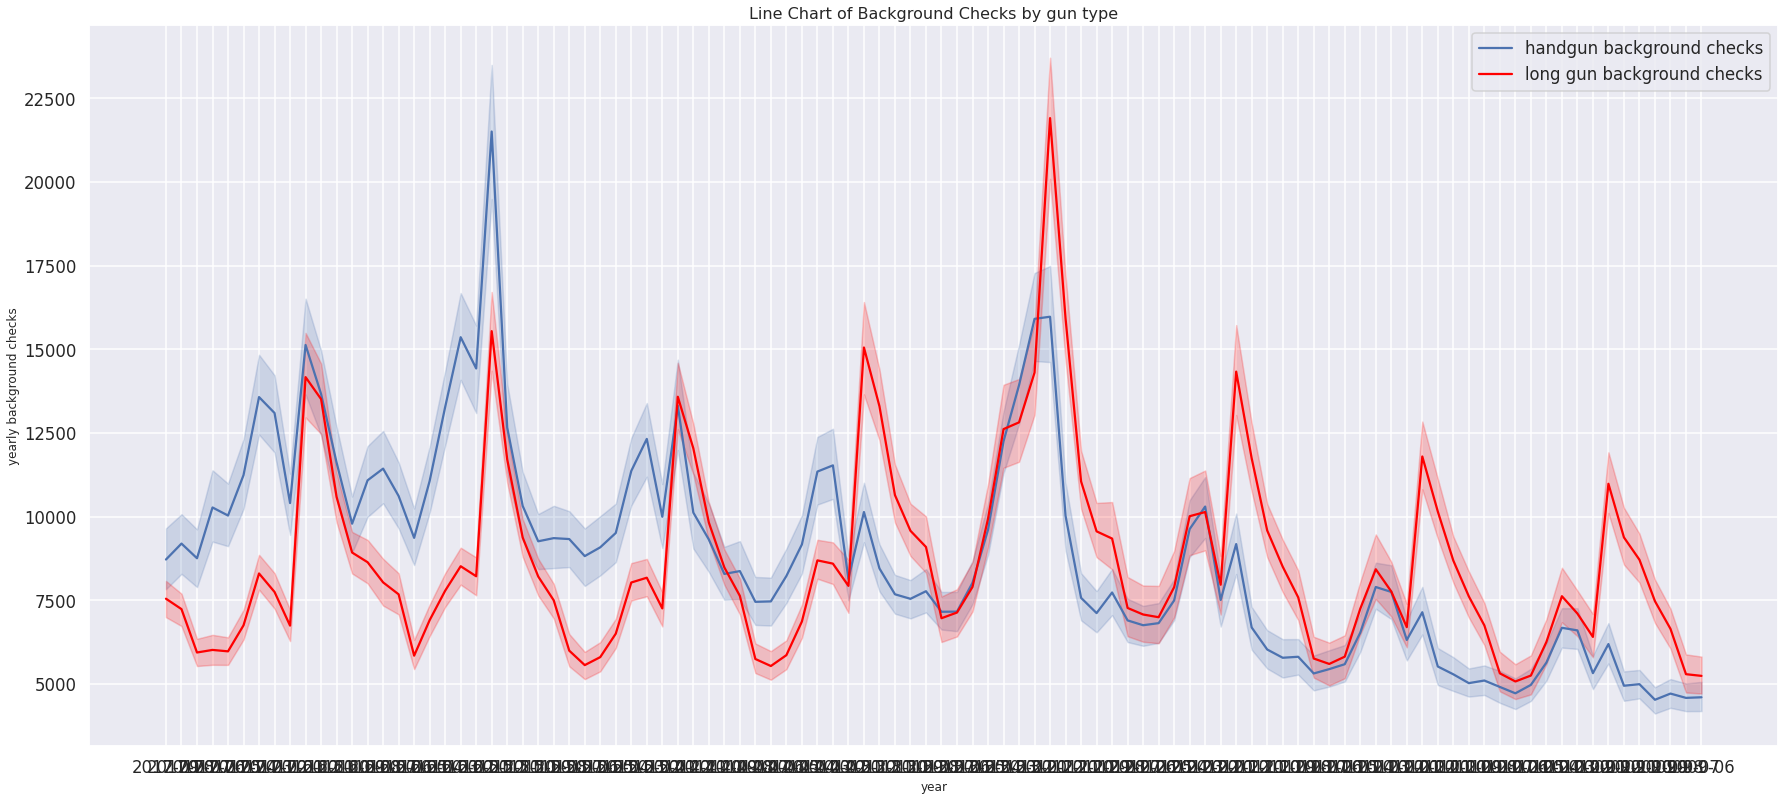

In [37]:
# graphing background checks for difference gun types versus dates, need to find how to see trend by state and time too
sns.set(rc={'figure.figsize':(30.27,13.27)}) # set figure size
sns.set_theme(context='talk') # set graph theme
sns.lineplot(x="month", y='7year_rolling_avg_handgun', data=gun_background_check, label='handgun background checks')
sns.lineplot(x="month", y='7year_rolling_avg_longgun', data=gun_background_check, label="long gun background checks", color='red')
plt.xlabel("year", size=12)
plt.ylabel("yearly background checks", size=12)
plt.title("Line Chart of Background Checks by gun type", size=16)


### Research Question 2  (Replace this header name!)


In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!